<a href="https://colab.research.google.com/github/sharan19/machine_learning/blob/master/R6_ExternalLab_AIML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
tf.set_random_seed(42)
import numpy as np

In [2]:
tf.__version__

'1.13.1'

In [3]:
import keras

Using TensorFlow backend.


In [4]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [5]:
print(testY[0:5])

[9 2 1 1 6]


In [0]:
trainY=tf.keras.utils.to_categorical(trainY)

In [0]:
testY=tf.keras.utils.to_categorical(testY)

In [8]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [9]:
print(trainX[0:5])

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


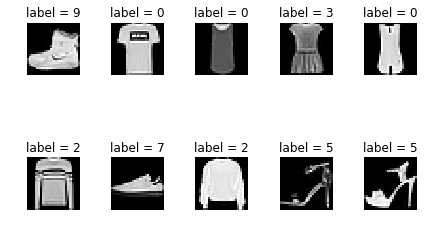

In [10]:
import matplotlib.pyplot as plt
 
ROW = 2
COLUMN = 5
for i in range(ROW * COLUMN):
    # train[i][0] is i-th image data with size 28x28
    #image = trainX[i][0].reshape(28, 28)   # not necessary to reshape if ndim is set to 2
    image = trainX[i]
    plt.subplot(ROW, COLUMN, i+1)          # subplot with size (width 3, height 5)
    plt.imshow(image, cmap='gray')  # cmap='gray' is for black and white picture.
    # train[i][1] is i-th digit label
    x= 0
    y =0
    for x,y in enumerate(trainY[i]):
      if y > 0:
        plt.title('label = {}'.format(x))
    plt.axis('off')  # do not show axis value
plt.tight_layout()   # automatic padding between subplots
#plt.savefig('images/mnist_plot.png')
plt.show()

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))


#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=10
          )

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 46us/sample - loss: 13.9883 - acc: 0.1321 - val_loss: 12.9009 - val_acc: 0.1996
Epoch 2/10
60000/60000 [==============================] - 3s 48us/sample - loss: 14.4857 - acc: 0.1013 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/10
60000/60000 [==============================] - 3s 48us/sample - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/10
60000/60000 [==============================] - 3s 48us/sample - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/10
60000/60000 [==============================] - 3s 48us/sample - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/10
60000/60000 [==============================] - 3s 45us/sample - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/10
60000/60000 [==============================] - 3s 44us/sample - loss: 14.5063 - acc: 0.1000 -

In [0]:
#Initialize Sequential model
model1 = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model1.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model1.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax
model1.add(tf.keras.layers.Dense(10, activation='softmax'))

#Comile the model
model1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=10
          )

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 45us/sample - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/10
60000/60000 [==============================] - 3s 45us/sample - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/10
60000/60000 [==============================] - 3s 45us/sample - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/10
60000/60000 [==============================] - 3s 44us/sample - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/10
60000/60000 [==============================] - 3s 44us/sample - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/10
60000/60000 [==============================] - 3s 45us/sample - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/10
60000/60000 [==============================] - 3s 45us/sample - loss: 14.5063 - acc: 0.1000 -

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
#Initialize Sequential model
from keras.optimizers import SGD
model2 = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model2.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model2.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax
model2.add(tf.keras.layers.Dense(10, activation='softmax'))
epochs = 10
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
#Comile the model
model2.compile(optimizer=tf.keras.optimizers.SGD(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
model2.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=10
          )

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.9384 - acc: 0.6829 - val_loss: 0.6871 - val_acc: 0.7641
Epoch 2/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.6495 - acc: 0.7757 - val_loss: 0.6094 - val_acc: 0.7911
Epoch 3/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.5928 - acc: 0.7967 - val_loss: 0.5730 - val_acc: 0.8037
Epoch 4/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.5624 - acc: 0.8055 - val_loss: 0.5568 - val_acc: 0.8122
Epoch 5/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.5410 - acc: 0.8144 - val_loss: 0.5381 - val_acc: 0.8160
Epoch 6/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.5263 - acc: 0.8179 - val_loss: 0.5273 - val_acc: 0.8210
Epoch 7/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.5164 - acc: 0.8223 - val_loss: 0.

In [0]:
#Initialize Sequential model
model3 = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model3.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model3.add(tf.keras.layers.BatchNormalization())
#Add 1st hidden layer
model3.add(tf.keras.layers.Dense(100, activation='sigmoid'))
#Add 2nd hidden layer
model3.add(tf.keras.layers.Dense(100, activation='sigmoid'))
#Add outputlayer 
model3.add(tf.keras.layers.Dense(10, activation='softmax'))
#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

#Compile the model
model3.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

## Review model

In [22]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_6 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_v1_5 (Ba (None, 784)               3136      
_________________________________________________________________
dense_8 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_9 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1010      
Total params: 92,746
Trainable params: 91,178
Non-trainable params: 1,568
_________________________________________________________________


In [23]:
model3.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=10
          )

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 113us/sample - loss: 1.0503 - acc: 0.6893 - val_loss: 0.6302 - val_acc: 0.7756
Epoch 2/10
60000/60000 [==============================] - 6s 105us/sample - loss: 0.5683 - acc: 0.8011 - val_loss: 0.5089 - val_acc: 0.8181
Epoch 3/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.4876 - acc: 0.8277 - val_loss: 0.4683 - val_acc: 0.8284
Epoch 4/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.4528 - acc: 0.8369 - val_loss: 0.4411 - val_acc: 0.8385
Epoch 5/10
60000/60000 [==============================] - 6s 108us/sample - loss: 0.4291 - acc: 0.8465 - val_loss: 0.4256 - val_acc: 0.8461
Epoch 6/10
60000/60000 [==============================] - 6s 108us/sample - loss: 0.4139 - acc: 0.8533 - val_loss: 0.4156 - val_acc: 0.8472
Epoch 7/10
60000/60000 [==============================] - 6s 105us/sample - loss: 0.3995 - acc: 0.8570 - val_l